In [1]:
# India_videos table contains Youtube videos record of India region
# Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.
in_videos = spark.sql("select * from india_videos")
#display(in_videos.select("*"))
display(in_videos.select("*").head(2))

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmish Verma | Releasing on 17 November,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry mann cute munda""|""sharry mann latest song""|""sharry mann punjabi song 2017""|""parmish verma""|""parmish verma new song""|""parmish verma sharry mann""|""parmish verma sharry mann new song""|""parmish verma cute munda""|""new punjabi song 2017""|""punjabi song 2017""|""parmish verma new song 2017""|""parmish verma latest song 2017""|""punjabi songs 2017""",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,FALSE,FALSE,FALSE,"Presenting Sharry Mann latest Punjabi Song Cute Munda Teaser . The music of new punjabi song is given by Gift Rulers while lyrics are penned by Zaildar Pargat Singh. The video is directed by Parmish Verma. \nEnjoy and stay connected with us!! \n\nSong : Cute Munda\nSinger : Sharry Mann\nStarring : Sharry Mann, Rumman & Parmish Verma\nMusic : Gift Rulers\nLyrics : Zaildar Pargat Singh\nConcept, Screenplay & Direction : Parmish Verma\nOnline Promotions : Gold Media\nCopyright: Lokdhun\n\nFull Song Releasing on 17th November\n\n\nFor more new Punjabi songs, latest Punjabi videos, funny Punjabi comedy scenes and new Punjabi movies, subscribe our channel - http://goo.gl/NnoXVB\n\n\nLike us on Facebook - https://www.facebook.com/LokdhunPunjabiOfficial/\nFollow us on Twitter - https://twitter.com/lokdhunpunjabi\nFollow us on Instagram - https://www.instagram.com/lokdhunpunjabi\nVisit us on https://www.lokdhun.com"
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दंग रह जायेंगे",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर दंग रह जायेंगे""|""latest news""|""today news""|""news""|""breaking news""|""current news""|""world news""|""hj news updates""|""bollywood updates""|""news channel in hindi""|""entertainment news""|""merrage""|""love""|""break up""|""perideus time""|""pragenent girl""|""baby born""",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,TRUE,FALSE,FALSE,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दंग रह जायेंगे \n\nWatch this video :- https://youtu.be/zUZ1z7FwLc8\n\nHere is the secret of the death of PCS wife Namrata on February 16, 2017, still persisted after 9 months. In the case, the relatives of the deceased had accused the in-laws of torture against dowry, after which the police sent the accused husband and mother-in-law and sent them to jail.\n\nThe mother of the deceased Kiran said, Humility was my little daughter, she was preparing to become an IAS. Then there was a relation of dedication from a matrimonial website. We were watching the relationship for our eldest daughter, I liked the humility. \n- We did not want that little sister's marriage to be a big one before, but humility itself was refusing marriage, but Mother of Divine took it to the center. Dipartan was PCS, so we also agreed for marriage. . ''\nDeepa's mother Anuradha had said that humility could continue her studies even after marriage. On this condition she was ready for marriage, both of them were married on June 10, 2015.\n- Cajun Sister Chitra said, The sister was emotionally attached to the lamp, there were many things that she used to share with me, but Deep used to torture her for dowry.\n- During the periods, the lamp beat him on the stomach and back. Sister came home and asked me to massage the stomach and back. She used to tell that Deep struck a lot, massage it. \n- I had advised sister to take the Divorce, but she did not want to break the relationship.\n\nSubscribe Us for Latest News & Updates ► https://goo.gl/K8pjDQ\n\nStay Connected with Us :\n\nFollow Us On Facebook ► https://goo.gl/GEkOqP\n\nFollow Us On Twitter ► https://twitter.com/hjnews4

In [2]:
#Display detailed information about the table, including parent database, table type, storage information, and properties.

spark.sql("ANALYZE TABLE india_videos COMPUTE STATISTICS")
form= spark.sql("DESCRIBE EXTENDED india_videos")
display(form)

col_name,data_type,comment
video_id,string,null
trending_date,string,null
title,string,null
channel_title,string,null
category_id,string,null
publish_time,string,null
tags,string,null
views,string,null
likes,string,null
dislikes,string,null


In [3]:
#Spark SQL supports converting existing RDDs into Datasets. This method uses reflection to infer the schema of an RDD that contains specific types of objects. This reflection-based approach leads to more concise code and works well when you already know the schema while writing your Spark application.

#  Data is of Zomato restaurant from various parts of the country with their cuisines, rating, average cost etc
from pyspark.sql import Row
import re

sc = spark.sparkContext

# Load a text file and convert each line to a Row.
lines = sc.textFile("/FileStore/tables/zomato.csv")

pattern = r"""((?:[^,"']|"[^"]*"|'[^']*')+)"""
parts =lines.map(lambda x: re.split(pattern , x)[1::2])
#parts.take(5)
rst_data = parts.map(lambda p: Row(Restaurant_Name=p[1],country_code=p[2],city=p[3],Address=p[4],Cuisines=p[9],Average_Cost=p[10], Currency=p[11],Aggregate_rating=p[17],Rating_text=p[19],Votes=p[20]))
#rst_data.take(5)
schemaRest = spark.createDataFrame(rst_data)
#schemaRest.show()
schemaRest.createOrReplaceTempView("Zomato_data")
top_restaurant = spark.sql("SELECT * FROM Zomato_data WHERE Aggregate_rating >= 4")
display(top_restaurant.head(1))

Address,Aggregate_rating,Average_Cost,Cuisines,Currency,Rating_text,Restaurant_Name,Votes,city,country_code
"""Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City""",4.8,1100,"""French, Japanese, Desserts""",Botswana Pula(P),Excellent,Le Petit Souffle,314,Makati City,162


In [4]:
#  query the file directly with SQL, it is good for parquet files but in CSV it will consider header also as a part of data
df = spark.sql("SELECT * FROM parquet.`/FileStore/tables/userdata1.parquet`")
display(df.head(2))

registration_dttm,id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments
2016-02-03T07:55:29.000+0000,1,Amanda,Jordan,ajordan0@com.com,Female,1.197.201.2,6759521864920116,Indonesia,3/8/1971,49756.53,Internal Auditor,1E+02
2016-02-03T17:04:03.000+0000,2,Albert,Freeman,afreeman1@is.gd,Male,218.111.175.34,,Canada,1/16/1968,150280.17,Accountant IV,


In [5]:
# Importing a csv file having quotes and comma as delimiter .
from pyspark.sql import SQLContext

schemaRest= sqlContext.read.format('csv').options(header='true', inferSchema='true',escape= "\"",quote= "\"").load("/FileStore/tables/zomato.csv")
display(schemaRest.head(2))

Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [6]:
# DataFrames can also be saved as persistent tables into Hive metastore using the saveAsTable command
schemaRest.write.partitionBy("Country_Code").format("parquet").saveAsTable("zomatobycountry")

In [7]:
# Checking created table metadata

form= spark.sql("DESCRIBE FORMATTED zomatobycountry")
display(form)

col_name,data_type,comment
Restaurant_ID,string,null
Restaurant_Name,string,null
City,string,null
Address,string,null
Locality,string,null
Locality_Verbose,string,null
Longitude,string,null
Latitude,string,null
Cuisines,string,null
Average_Cost_for_two,string,null


In [8]:
# how many countries data we have
result = sqlContext.sql("SELECT COUNT(distinct Country_Code) AS CountryCount FROM zomatobycountry").collect()
display(result)

CountryCount
21


In [9]:
# create country table in Hive using hive context , skip 1st row as header

from pyspark.sql import HiveContext
from pyspark.context import SparkContext
sc = spark.sparkContext

hc = HiveContext(sc)

hc.sql("CREATE TABLE IF NOT EXISTS Country(country_code INT, name STRING) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\n' ")

hc.sql("LOAD DATA INPATH '/FileStore/tables/country_code.csv' INTO TABLE Country")

display(hc.sql("FROM Country SELECT country_code ,name").head(5))
# hc.sql("DROP TABLE Country") # drop table if needed

country_code,name
1,India
14,Australia
30,Brazil
37,Canada
94,Indonesia


In [10]:
# join the country table and zomato data and store the result in a view so that we can use it for different types of analysis, cast the datatype to int.
spark.sql(" Create or replace view zomato as SELECT z.Restaurant_ID,z.Restaurant_Name,c.name,z.City,z.Address,z.Cuisines,cast(z.Average_Cost_for_two as int),z.Currency,cast(z.Price_range as int), cast(z.Aggregate_rating as float),z.Rating_color,z.Rating_text,cast(z.Votes as int) FROM zomatobycountry z JOIN Country c ON z.Country_Code = c.country_code")
#spark.sql(" select * from zomato").show()
spark.sql("describe zomato").show()

+--------------------+---------+-------+
 col_name|data_type|comment|
+--------------------+---------+-------+
 Restaurant_ID| string| null|
 Restaurant_Name| string| null|
 name| string| null|
 City| string| null|
 Address| string| null|
 Cuisines| string| null|
Average_Cost_for_two| int| null|
 Currency| string| null|
 Price_range| int| null|
 Aggregate_rating| float| null|
 Rating_color| string| null|
 Rating_text| string| null|
 Votes| int| null|
+--------------------+---------+-------+

In [11]:
# Pick up the Top 2 restaurants from each country. Note that order is given for both columns in window function
display(hc.sql(" select * from zomato left semi join (select Restaurant_ID,name,Aggregate_rating,Votes,rank() over (partition by name order by Aggregate_rating desc,Votes desc  ) as rnk from zomato where Votes is not null and Aggregate_rating is not null) tmp on tmp.Restaurant_ID= zomato.Restaurant_ID and tmp.rnk <=2 "))
#hc.sql("select * from zomato where Votes is null").show()

Restaurant_ID,Restaurant_Name,name,City,Address,Cuisines,Average_Cost_for_two,Currency,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
94286,AB's - Absolute Barbecues,India,Hyderabad,"Plot 483, 4th Floor, Pemmasani Complex, Bajaj Electronics Building, Near Madhapur Police Station, Road 36, Jubilee Hills, Hyderabad","European, Mediterranean, North Indian",1500,Indian Rupees(Rs.),3,4.9,Dark Green,Excellent,5434
20842,Barbeque Nation,India,Kolkata,"K1, RDB Boulevard, Block EP & GP, Sector 5, Salt Lake","North Indian, Chinese",1600,Indian Rupees(Rs.),3,4.9,Dark Green,Excellent,5966
17061296,Pom Pom's Teahouse and Sandwicheria,United States,Orlando,"67 North Bumby Avenue, Orlando, FL 32803","American, Sandwich, Tea",25,Dollar($),2,4.9,Dark Green,Excellent,1457
17580142,McGuire's Irish Pub & Brewery,United States,Pensacola,"600 E Gregory Street, Pensacola, FL 32502","Burger, Bar Food, Steak",40,Dollar($),3,4.9,Dark Green,Excellent,2238
6114338,Flat Iron,United Kingdom,London,"17 Beak Street, Soho, London W1F 9RW",Steak,35,Pounds(��),2,4.9,Dark Green,Excellent,309
6114829,Duck & Waffle,United Kingdom,London,"Heron Tower, 110 Bishopsgate, City of London, London EC2N 4AY",British,55,Pounds(��),3,4.9,Dark Green,Excellent,706
18269368,AB's Absolute Barbecues,UAE,Dubai,"Mezzanaine Floor, Centurion Star Tower, Deira City Centre Area, Dubai","Continental, Indian",160,Emirati Diram(AED),3,4.9,Dark Green,Excellent,641
208850,Tresind - Nassima Royal Hotel,UAE,Dubai,"Level 2, Nassima Royal Hotel, Sheikh Zayad Road, Trade Centre Area, Dubai",Indian,500,Emirati Diram(AED),4,4.9,Dark Green,Excellent,1352
6501534,Cube - Tasting Kitchen,South Africa,Inner City,"24 Albrecht Road, Maboneng Precinct, City and Suburban, Inner City","European, Contemporary",1540,Rand(R),4,4.9,Dark Green,Excellent,441
18339373,Urbanologi,South Africa,Inner City,"1 Fox Street, Marshalltown, Inner City, Johannesburg",Tapas,700,Rand(R),4,4.9,Dark Green,Excellent,194


In [12]:
# Get unique list of cuisines using Hive explode funtion
import numpy as np
hc.sql("create or replace view cuisine as select distinct cus from (select distinct split(Cuisines,'\\,') as cuisine from zomato where Cuisines is not null) a lateral view explode(cuisine) subview as cus")

#hc.sql("select * from cuisine").show()

cus_array= np.array(hc.sql("select TRIM(cus) from cuisine").collect())
cus_array=np.unique(cus_array).tolist()
cus_array[4]
#(str(cus_array[4]))
#len(cus_array)

Out[ 279 ]: 'Arabian'

In [13]:
# create a panda dataframe having Restaurant Id and cuisines
rest_data =hc.sql("select Restaurant_ID,Cuisines from zomato where Cuisines is not null").toPandas()
display(rest_data.head(2))

Restaurant_ID,Cuisines
3400025,"North Indian, Mughlai"
3400341,"North Indian, Mughlai"


In [14]:
rest_data['Cuisines'].str.contains('Salad').sum()
#type(np.array([(1 if 'Salad' in item else 0) for item in rest_data['Cuisines']]).sum().item())

Out[ 282 ]: 93

In [15]:
 #rest_data.apply[lambda df1: rest_data.Cuisines in 'Mughlai']
#np.array([(1 if 'Mughlai' in item else 0) for item in rest_data['Cuisines']]).sum()
#rest_data.apply(lambda [(1 if 'Mughlai' in item else 0) for item in rest_data['Cuisines']])

#[(1 if 'Mughlai' in item else 0) for item in rest_data['Cuisines']]
coun=[]
Cuis=[]
for i in range(0,len(cus_array)):
  text=str(cus_array[i])
  c=rest_data['Cuisines'].str.contains(text).sum()
  coun.append(c)
  Cuis.append(text)

cuisine_df = pd.DataFrame({'Cuisines':Cuis,'Restau_counts':coun}).sort_values(by='Restau_counts',ascending=False)
top_15=cuisine_df.head(15)
display(top_15.head())

Cuisines,Restau_counts
Indian,4257
North Indian,3958
Chinese,2731
Fast Food,1985
Mughlai,993


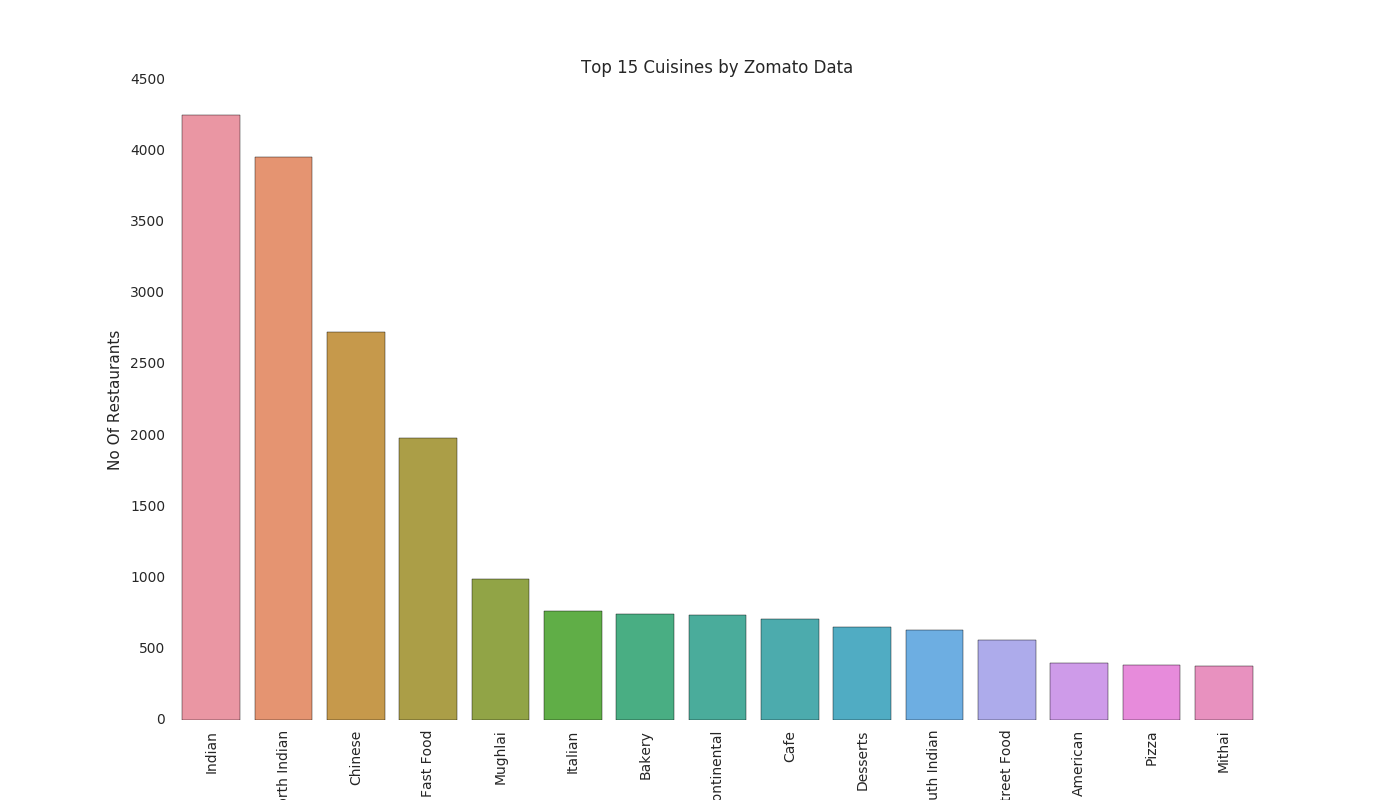

In [16]:
# How many resturants are there for each cuisine
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd

fig = plt.figure(figsize=(14,8))
sns.barplot(x=top_15['Cuisines'],y=top_15['Restau_counts'])
plt.ylabel("No Of Restaurants")
plt.title("Top 15 Cuisines by Zomato Data")
plt.xticks(rotation='vertical')
display(plt.show())